In [82]:
# Cargar librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lectura de datos

In [25]:
# Lectura de datos
df = pd.read_csv('https://raw.githubusercontent.com/SantiRestrepoOlarte/Trabajo_analitica_2/main/ecommerce-data.csv', na_values='?')
df.head()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [26]:
df.shape

(12330, 18)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  int64  
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [28]:
df.describe()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [29]:
# Datos faltantes
df.isnull().sum()

Reviews                    0
Reviews_Duration           0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Purchase                   0
dtype: int64

# Exploración de variables (columnas)

In [30]:
df.head()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# Columna 'Reviews'
#df['Reviews'].describe()
df['Reviews'].unique()
#df['Reviews'].nunique()
df['Reviews'].value_counts()

In [ ]:
# Columna 'Reviews_Duration'
df['Reviews_Duration'].describe()
df['Reviews_Duration'].unique()
df['Reviews_Duration'].nunique()
df['Reviews_Duration'].value_counts()

In [ ]:
# Columna 'Informational'
#df['Informational'].describe()
#df['Informational'].unique()
#df['Informational'].nunique()
df['Informational'].value_counts()

In [39]:
# Columna 'Informational_Duration'
#df['Informational_Duration'].describe()
#df['Informational_Duration'].unique()
df['Informational_Duration'].nunique()
#df['Informational_Duration'].value_counts()

1258

In [42]:
# Columna 'ProductRelated'
df['ProductRelated'].describe()
df['ProductRelated'].unique()
df['ProductRelated'].nunique()
#df['ProductRelated'].value_counts()

311

In [45]:
# Columna 'ProductRelated_Duration'
df['ProductRelated_Duration'].describe()
df['ProductRelated_Duration'].unique()
df['ProductRelated_Duration'].nunique()
#df['ProductRelated_Duration'].value_counts()

9551

In [ ]:
# Columna 'BounceRates'
df['BounceRates'].describe()
df['BounceRates'].unique()
df['BounceRates'].nunique()
#df['BounceRates'].value_counts()

In [ ]:
# Columna 'ExitRates'
df['ExitRates'].describe()
#df['ExitRates'].unique()
#df['ExitRates'].nunique()
#df['ExitRates'].value_counts()

In [55]:
# Columna 'PageValues'
df['PageValues'].describe()
#df['PageValues'].unique()
#df['PageValues'].nunique()
#df['PageValues'].value_counts()

array([ 0.        , 54.17976426, 19.44707913, ..., 78.81172527,
        3.68540082, 12.24171745])

In [ ]:
# Columna 'SpecialDay'
df['SpecialDay'].describe()
df['SpecialDay'].unique()
df['SpecialDay'].nunique()
df['SpecialDay'].value_counts()

In [ ]:
# Columna 'Month'
df['Month'].describe()
df['Month'].unique()
df['Month'].nunique()
df['Month'].value_counts()

# No está abril ni enero

In [ ]:
# Columna 'OperatingSystems'
df['OperatingSystems'].describe()
df['OperatingSystems'].unique()
df['OperatingSystems'].nunique()
df['OperatingSystems'].value_counts()

In [ ]:
# Columna 'Browser'
df['Browser'].describe()
df['Browser'].unique()
df['Browser'].nunique()
df['Browser'].value_counts()

In [ ]:
# Columna 'Region'
df['Region'].describe()
df['Region'].unique()
df['Region'].nunique()
df['Region'].value_counts()

In [ ]:
# Columna 'TrafficType'
df['TrafficType'].describe()
#df['TrafficType'].unique()
#df['TrafficType'].nunique()
#df['TrafficType'].value_counts()

In [ ]:
# Columna 'VisitorType'
df['VisitorType'].describe()
#df['VisitorType'].unique()
#df['VisitorType'].nunique()
#df['VisitorType'].value_counts()

In [ ]:
# Columna 'Weekend'
df['Weekend'].describe()
#df['Weekend'].unique()
#df['Weekend'].nunique()
#df['Weekend'].value_counts()

In [95]:
# Columna 'Purchase' (VARIABLE OBJETIVO)
df['Purchase'].describe()
df['Purchase'].unique()
df['Purchase'].nunique()
df['Purchase'].value_counts()

Purchase
False    10422
True      1908
Name: count, dtype: int64

[Text(0, 0, '0'), Text(1, 0, '1')]

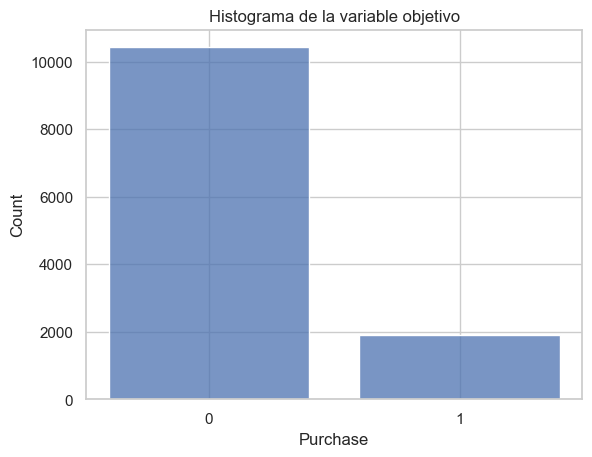

In [97]:
ax = sns.histplot(data=df, x='Purchase', bins=[0, 0.5, 1.5], discrete=True, shrink=0.8)

plt.xlabel('Purchase')
plt.ylabel('Count')
plt.title('Histograma de la variable objetivo')

ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1'])

In [96]:
total=10422+1908
total1=1908/total
total0=10422/total

total1,total0

(0.15474452554744525, 0.8452554744525548)

In [ ]:
# Variable objetivo desbalanceada
# 84.52% es 0 (no compra)
# 15.48% es 1 (compra)